# Flights Data Exploration Challenge

In this challenge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

In [52]:
import pandas as pd

df_flights = pd.read_csv('data/flights.csv')
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    - Identify any null or missing data, and impute appropriate replacement values.
    - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
2. Explore the cleaned data.
    - View summary statistics for the numeric fields in the dataset.
    - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        - *What are the average (mean) departure and arrival delays?*
        - *How do the carriers compare in terms of arrival delay performance?*
        - *Is there a noticable difference in arrival delays for different days of the week?*
        - *Which departure airport has the highest average departure delay?*
        - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        - *Which route has the highest average arrival delay?*
        
Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [01 - Flights Challenge.ipynb](01%20-%20Flights%20Solution.ipynb).

# Load Data

In [53]:
import pandas as pd

df_flights = pd.read_csv('data/flights.csv')
print(df_flights.info())
df_flights.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271940 entries, 0 to 271939
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               271940 non-null  int64  
 1   Month              271940 non-null  int64  
 2   DayofMonth         271940 non-null  int64  
 3   DayOfWeek          271940 non-null  int64  
 4   Carrier            271940 non-null  object 
 5   OriginAirportID    271940 non-null  int64  
 6   OriginAirportName  271940 non-null  object 
 7   OriginCity         271940 non-null  object 
 8   OriginState        271940 non-null  object 
 9   DestAirportID      271940 non-null  int64  
 10  DestAirportName    271940 non-null  object 
 11  DestCity           271940 non-null  object 
 12  DestState          271940 non-null  object 
 13  CRSDepTime         271940 non-null  int64  
 14  DepDelay           271940 non-null  int64  
 15  DepDel15           269179 non-null  float64
 16  CR

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
88226,2013,4,20,6,DL,11433,Detroit Metro Wayne County,Detroit,MI,13487,Minneapolis-St Paul International,Minneapolis,MN,1725,-3,0.0,1823,-15,0,0
72088,2013,4,1,1,US,11057,Charlotte Douglas International,Charlotte,NC,14027,Palm Beach International,West Palm Beach/Palm Beach,FL,740,20,1.0,926,30,1,0
32080,2013,4,28,7,US,12478,John F. Kennedy International,New York,NY,11057,Charlotte Douglas International,Charlotte,NC,825,-4,0.0,1026,5,0,0
199805,2013,9,11,3,WN,14730,Louisville International-Standiford Field,Louisville,KY,14107,Phoenix Sky Harbor International,Phoenix,AZ,700,-3,0.0,745,-18,0,0
150486,2013,10,5,6,DL,14100,Philadelphia International,Philadelphia,PA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,1530,-5,0.0,1739,-9,0,0
213936,2013,6,12,3,WN,13232,Chicago Midway International,Chicago,IL,10821,Baltimore/Washington International Thurgood Ma...,Baltimore,MD,1955,0,NaN,2240,0,1,1
112534,2013,4,26,5,AA,11298,Dallas/Fort Worth International,Dallas/Fort Worth,TX,10821,Baltimore/Washington International Thurgood Ma...,Baltimore,MD,1120,21,1.0,1515,17,1,0
211371,2013,4,15,1,AA,11298,Dallas/Fort Worth International,Dallas/Fort Worth,TX,14057,Portland International,Portland,OR,1730,67,1.0,1935,76,1,0
264996,2013,5,25,6,AS,14679,San Diego International,San Diego,CA,10721,Logan International,Boston,MA,930,-8,0.0,1755,4,0,0
64848,2013,8,31,6,WN,13204,Orlando International,Orlando,FL,14843,Luis Munoz Marin International,San Juan,PR,1430,5,0.0,1720,0,0,0


# Clean Data

In [54]:
print(df_flights.isna().sum())
df_flights.DepDel15 = df_flights.DepDel15.fillna(0)

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64


# Identify Outliers

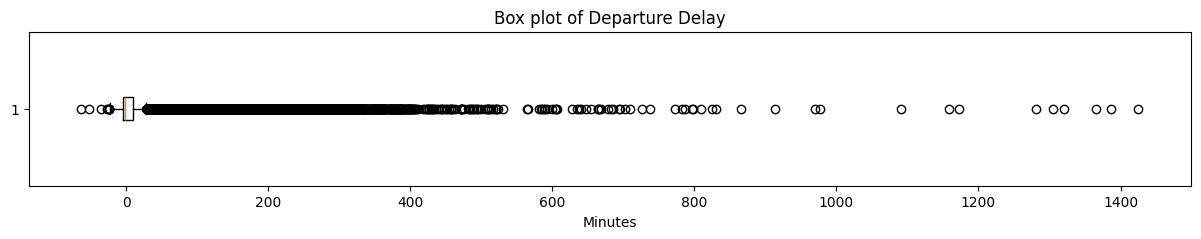

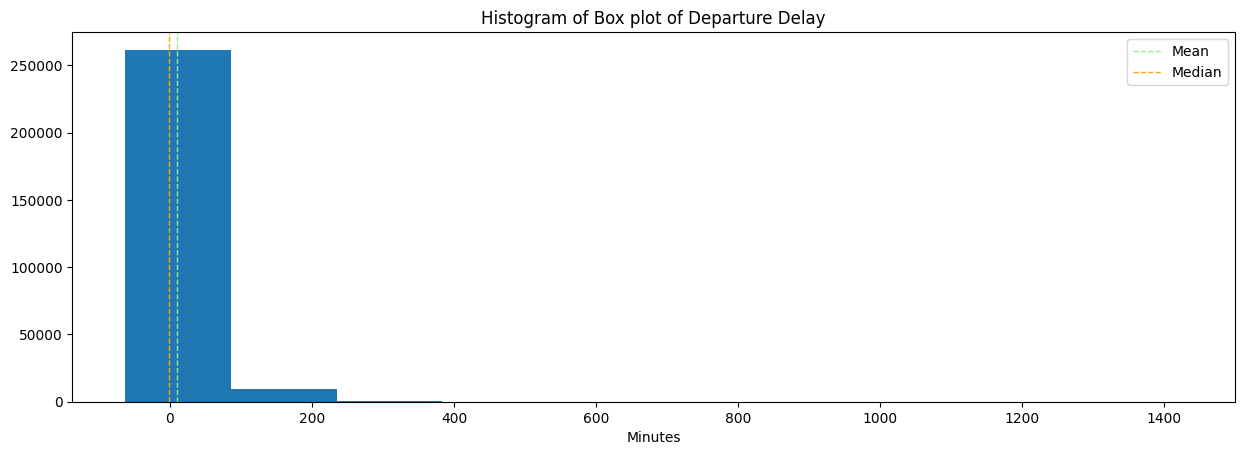

Mean: 10.350448628373906, Median: -1.0


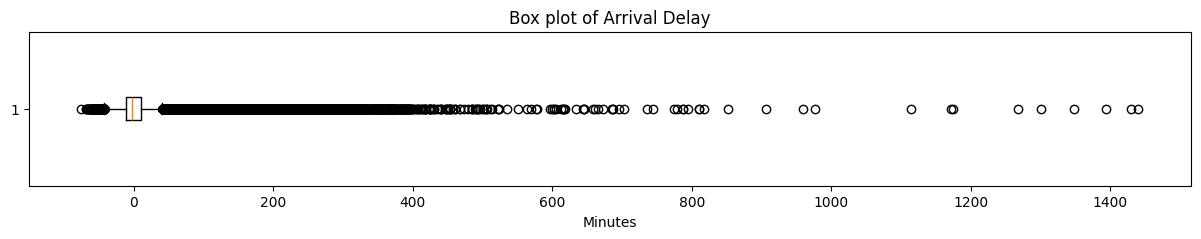

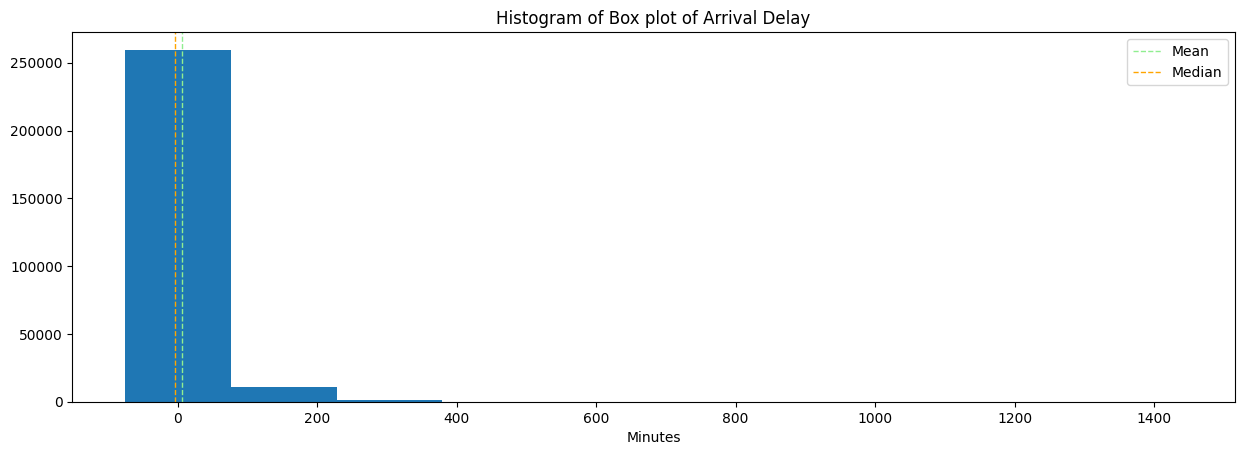

Mean: 6.496649996322718, Median: -3.0


In [60]:
from matplotlib import pyplot as plt

def plot_distribution(data, title, plot_outliers=True):
    # Get statistics
    mean_val = data.mean()
    median_val = data.median()

    whis = 1.5 if plot_outliers else (0, 100) # If not plotting outliers, set whiskers to min and max. Otherwise use default 1.5 IQR.

    plt.figure().set_size_inches(15, 2)
    plt.boxplot(data, orientation='horizontal', whis=whis)
    plt.title(title)
    plt.xlabel('Minutes')
    plt.show()

    plt.figure().set_figwidth(15)
    plt.hist(data)
    plt.title(f'Histogram of {title}')
    plt.xlabel('Minutes')
    plt.axvline(mean_val, color='lightgreen', linestyle='dashed', linewidth=1, label='Mean')
    plt.axvline(median_val, color='orange', linestyle='dashed', linewidth=1, label='Median')
    plt.legend()
    plt.show()
        
    print(f'Mean: {mean_val}, Median: {median_val}')

plot_distribution(df_flights['DepDelay'], 'Box plot of Departure Delay')
plot_distribution(df_flights['ArrDelay'], 'Box plot of Arrival Delay')

# Remove Outliers

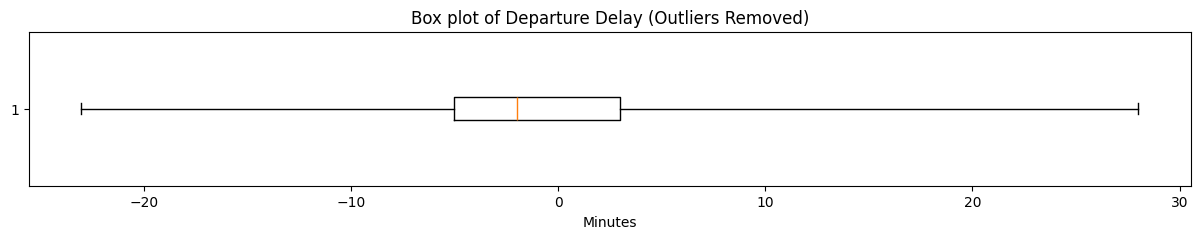

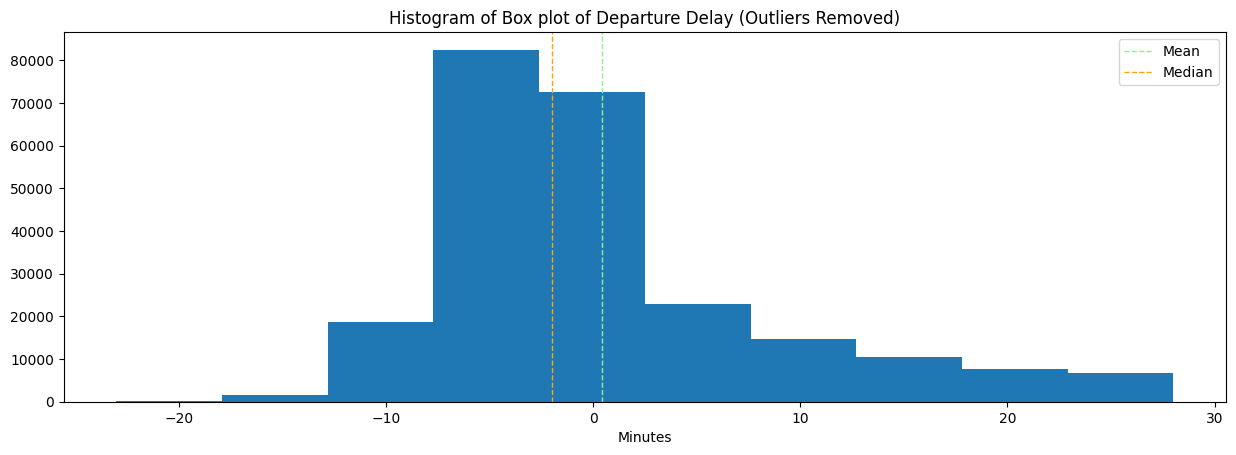

Mean: 0.4552887566104203, Median: -2.0


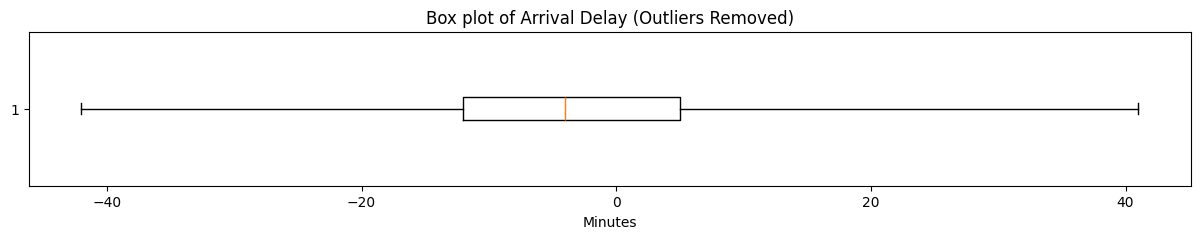

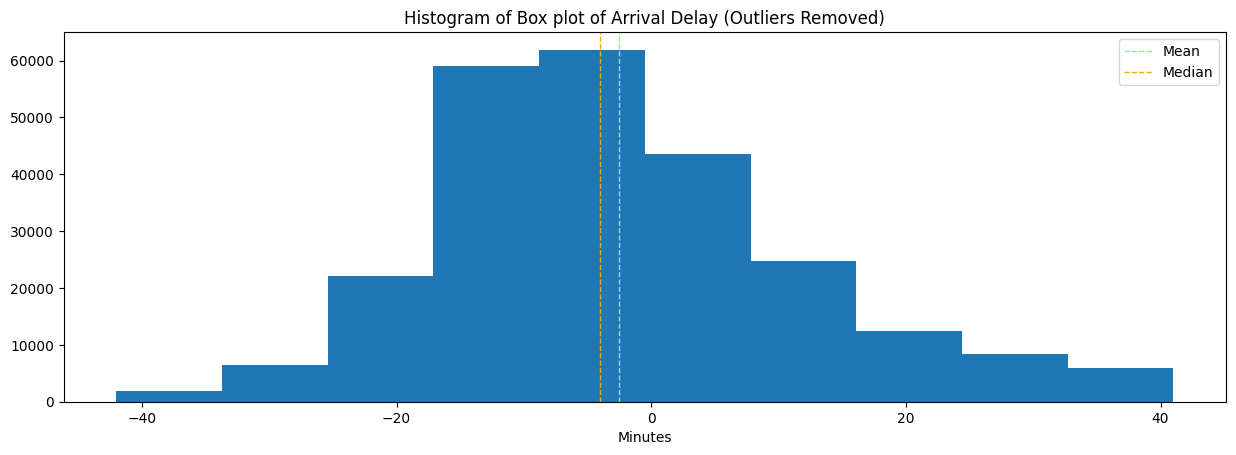

Mean: -2.5597414656497217, Median: -4.0


In [61]:
def remove_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return data[(data >= lower_bound) & (data <= upper_bound)]

dep_delays_without_outliers = remove_outliers(df_flights['DepDelay'])
arr_delays_without_outliers = remove_outliers(df_flights['ArrDelay'])

plot_distribution(dep_delays_without_outliers, 'Box plot of Departure Delay (Outliers Removed)', plot_outliers=False)
plot_distribution(arr_delays_without_outliers, 'Box plot of Arrival Delay (Outliers Removed)', plot_outliers=False)

- *What are the average (mean) departure and arrival delays?*
- *How do the carriers compare in terms of arrival delay performance?*
- *Is there a noticable difference in arrival delays for different days of the week?*
- *Which departure airport has the highest average departure delay?*
- *Do **late** departures tend to result in longer arrival delays than on-time departures?*
- *Which route (from origin airport to destination airport) has the most **late** arrivals?*
- *Which route has the highest average arrival delay?*

In [57]:
def print_statistics(data, title):
    mean_val = data.mean()
    median_val = data.median()
    print(f'{title}\n Average: {mean_val:+.6f}\n Median:  {median_val:+}')

print_statistics(dep_delays_without_outliers, 'Departure Delays')
print_statistics(arr_delays_without_outliers, 'Arrival Delays')

Departure Delays
 Average: +0.455289
 Median:  -2.0
Arrival Delays
 Average: -2.559741
 Median:  -4.0


Carriers: ['9E' 'AA' 'AS' 'B6' 'DL' 'EV' 'F9' 'FL' 'HA' 'MQ' 'OO' 'UA' 'US' 'VX'
 'WN' 'YV']


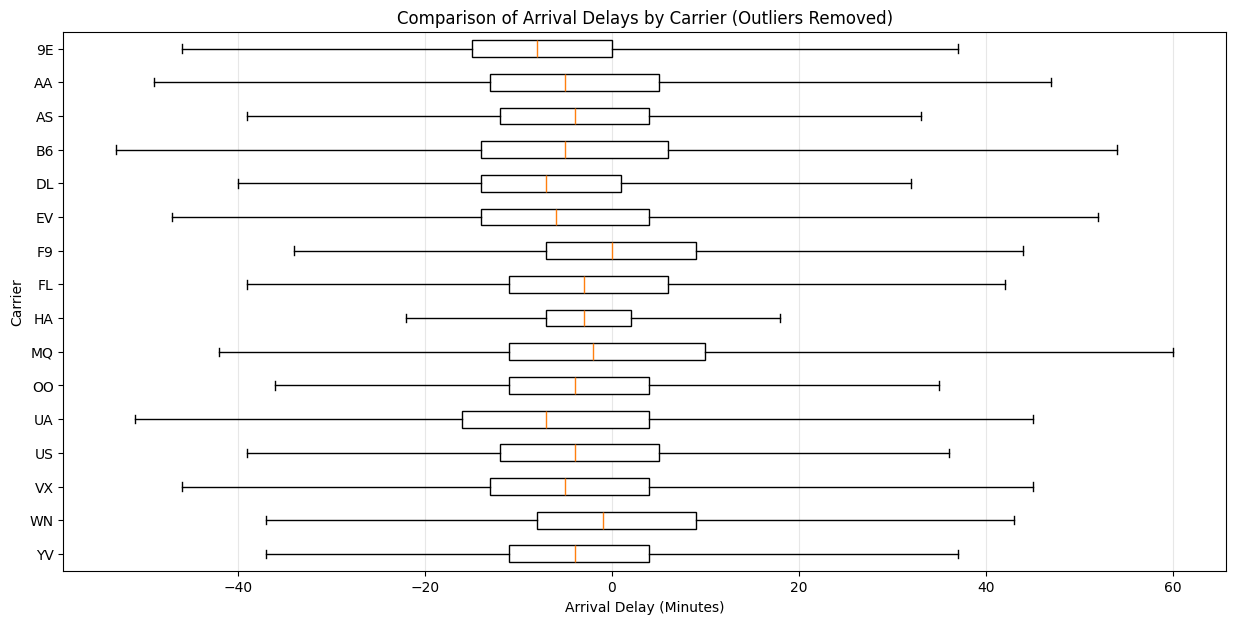

In [ ]:
def plot_compare_arr_delays_by_x():
    carriers = df_flights['Carrier'].unique() # Get unique carriers
    carriers.sort() # Sort carriers for better visualization
    carriers_reverse = carriers[::-1] # Reverse for better visualization
    print(f'Carriers: {carriers}')
    
    # Split data by carrier and remove outliers for each carrier
    carrier_arr_delays = {}
    for carrier in carriers_reverse:
        carrier_data = df_flights[df_flights['Carrier'] == carrier]
        arr_delays = remove_outliers(carrier_data['ArrDelay'])
        carrier_arr_delays[carrier] = arr_delays
        
    fig, ax = plt.subplots(figsize=(15, 7))
    ax.boxplot(carrier_arr_delays.values(), whis=(0, 100), orientation='horizontal', patch_artist=True, boxprops=dict(facecolor='white'))
    ax.set_yticklabels(carrier_arr_delays.keys())
    ax.set_xlabel('Arrival Delay (Minutes)')
    ax.set_ylabel('Carrier')
    ax.set_title('Comparison of Arrival Delays by Carrier (Outliers Removed)')
    # plt.axvline(0, color='lightgray', linestyle='dashed', linewidth=1, zorder=0)
    plt.grid(True, axis='x', alpha=0.3)
    
plot_compare_arr_delays_by_x()